<h2> <center> Multiple linear regression (MLR) </center> </h2>
<a href="https://colab.research.google.com/github/thedhruvish/ml-algorithms-project/blob/main/linear-regression/project-1.ipynb">
<img src="https://raw.githubusercontent.com/thedhruvish/dataset-machine-learning/refs/heads/main/public/colab.svg" alt="colab svg"></a>

In [ ]:
## install
%pip install pandas numpy matplotlib seaborn plotly streamlit
%pip install -U scikit-learn

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/thedhruvish/dataset-machine-learning/refs/heads/main/ml-algorithms-project/Advertising.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## Drop the first column Unnamed: 0 

In [5]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<Axes: >

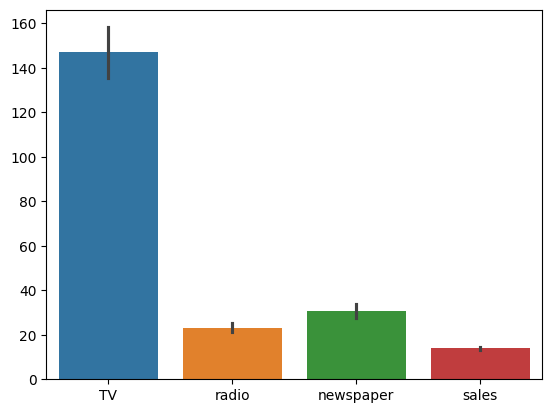

In [7]:
sns.barplot(df)

<Axes: xlabel='TV', ylabel='sales'>

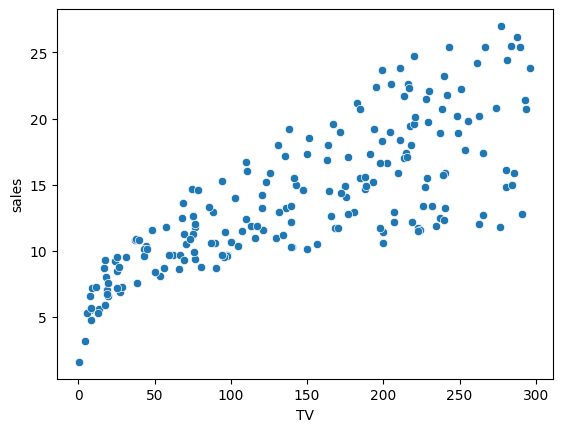

In [8]:
sns.scatterplot(x=df['TV'],y=df['sales'])

<Axes: xlabel='radio', ylabel='sales'>

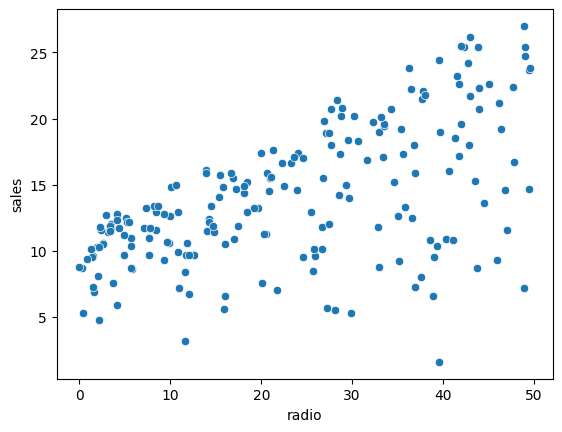

In [9]:
sns.scatterplot(x=df['radio'],y=df['sales'])

<Axes: xlabel='newspaper', ylabel='sales'>

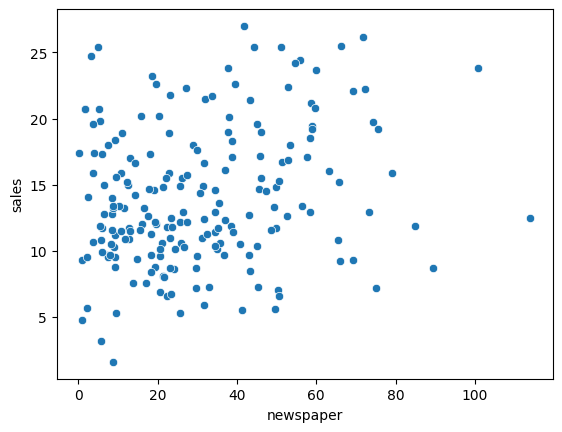

In [10]:
sns.scatterplot(x=df['newspaper'],y=df['sales'])

In [11]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## sales are the prediction colummn

In [12]:
X = df.drop(columns=['sales'])
y = df['sales']

In [13]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [14]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

## split dataset in the train and test

In [15]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=51)

## fit dataset in the model

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [17]:
lr.fit(X_train,y_train)

LinearRegression()

In [18]:
y_predict = lr.predict(x_test)

In [19]:
x_test

,TV,radio,newspaper
148,38.0,40.3,11.9
104,238.2,34.3,5.3
4,180.8,10.8,58.4
7,120.2,19.6,11.6
192,17.2,4.1,31.6
160,172.5,18.1,30.7
118,125.7,36.9,79.2
58,210.8,49.6,37.7
190,39.5,41.1,5.8
174,222.4,3.4,13.1


In [20]:
y_test.shape

(40,)

In [ ]:
y_predict

array([11.97312561, 20.23176536, 13.38822857, 12.0974879 ,  4.53157716,
       14.28524433, 15.51393986, 21.7241231 , 12.18116482, 13.96304017,
       16.66943736,  7.11112233, 12.78962103, 11.46926161, 12.07321755,
       18.98061007, 12.33573161, 14.42847869, 22.02963829, 18.42554105,
       10.14651642, 12.87370627, 15.19588354, 11.38619153, 19.98585303,
       14.97661689, 23.78312095, 16.70156332, 17.27085273, 23.2731835 ,
       16.44667178,  7.7772211 , 16.78838446, 15.02256333,  9.77867148,
       15.89627063,  7.85338865,  8.88378547, 15.33530012, 21.63029002])

## metrics 

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [21]:
r2 = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

In [22]:
print("R2 Score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

R2 Score: 0.9079126096145103
MAE: 1.0926851567778733
MSE: 2.1153158471512974
RMSE: 1.4544125436585376


<Axes: title={'center': 'Best fit line'}, xlabel='sales'>

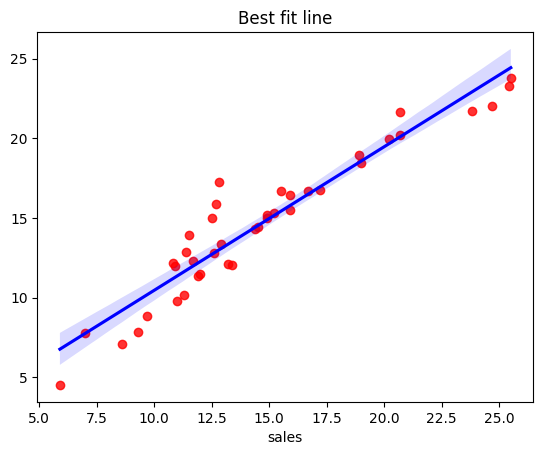

In [23]:
plt.title("Best fit line")
sns.regplot(x=y_test, y=y_predict,color='r',marker='o',line_kws={"color": "blue",} )

In [24]:
import pickle

In [ ]:
with open("advertising_model.pkl",'wb') as f:
    pickle.dump(lr,f)

In [26]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [31]:
pred =  pd.DataFrame(data={"TV":[54],"radio":[15],"newspaper":[12]})    
pred


,TV,radio,newspaper
0,54,15,12
